In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing

In [2]:
from py4mac.ml.preprocessing.feature_selection import UnivariateFeatureSelection, GreedyFeatureSelection

# 1 - Univariate feature selection

In [3]:
data = fetch_california_housing()
X = data["data"]
col_names = data["feature_names"]
y = data["target"]

In [4]:
df = pd.DataFrame(X, columns=col_names)
df.loc[:, "MedInSqrt"] = df.MedInc.apply(np.sqrt)
df.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedInSqrt
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.984329
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,-0.132797
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.326688
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.066910
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,0.018415
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,0.015266
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.084303
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.015569
MedInSqrt,0.984329,-0.132797,0.326688,-0.066910,0.018415,0.015266,-0.084303,-0.015569,1.000000


In [5]:
ufs = UnivariateFeatureSelection(n_features=0.1, problem_type="regression", scoring="f_regression")
ufs.fit(X, y)
X_transformed = ufs.transform(X)
X_transformed

array([[8.3252],
       [8.3014],
       [7.2574],
       ...,
       [1.7   ],
       [1.8672],
       [2.3886]])

In [6]:
X_transformed.shape

(20640, 1)

In [7]:
X.shape

(20640, 8)

# 2 - Greedy feature selection

In [8]:
from sklearn.datasets import make_classification

In [9]:
X, y = make_classification(n_samples=1000, n_features=5)

In [10]:
X_transformed, scores = GreedyFeatureSelection()(X, y)
print(X_transformed)
print(scores)

[[ 1.09935905  1.02643176  1.02643176 -1.21419181 -1.21419181 -1.53010917]
 [-1.11449753 -0.82795067 -0.82795067 -0.6098306  -0.6098306   1.36604553]
 [-1.2638708   1.92859696  1.92859696  0.37901529  0.37901529 -0.94774095]
 ...
 [ 0.03439064 -0.00645524 -0.00645524 -0.77815003 -0.77815003 -0.01428569]
 [-2.48438867  1.67148148  1.67148148 -1.21549975 -1.21549975 -0.01737869]
 [ 1.54583464 -0.45932736 -0.45932736  0.41145954  0.41145954 -0.49482871]]
[0.501118111811181, 0.9473907390739074, 0.9473907390739074, 0.9476307630763077, 0.9476307630763077, 0.9476387638763877]


# 3 - RFE

In [14]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [15]:
data = fetch_california_housing()
X = data["data"]
col_names = data["feature_names"]
y = data["target"]

model = LinearRegression()
rfe = RFE(
    estimator=model,
    n_features_to_select=3
)
rfe.fit(X, y)

X_transformed = rfe.transform(X)


In [17]:
rfe.ranking_

array([1, 4, 3, 2, 6, 5, 1, 1])

In [18]:
X_transformed.shape

(20640, 3)

In [19]:
X.shape

(20640, 8)

In [20]:
X[0]

array([   8.3252    ,   41.        ,    6.98412698,    1.02380952,
        322.        ,    2.55555556,   37.88      , -122.23      ])

In [22]:
X_transformed[0]

array([   8.3252,   37.88  , -122.23  ])

# 4 - Feature Importance

In [23]:
from sklearn.datasets import load_diabetes
from sklearn.ensemble import RandomForestRegressor

In [24]:
data = load_diabetes()
X = data["data"]
col_names = data["feature_names"]
y = data["target"]

model = RandomForestRegressor()
model.fit(X, y)

RandomForestRegressor()

In [25]:
importances = model.feature_importances_

In [26]:
importances

array([0.05701271, 0.01301602, 0.30132799, 0.09313605, 0.04369021,
       0.05971235, 0.05092806, 0.0236479 , 0.28121092, 0.07631779])

In [27]:
idxs = np.argsort(importances)
idxs

array([1, 7, 4, 6, 0, 5, 9, 3, 8, 2])

In [29]:
import matplotlib.pyplot as plt

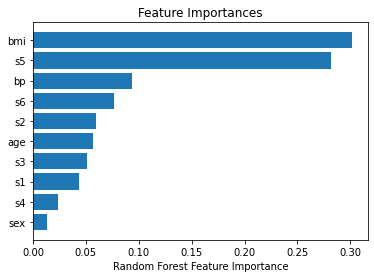

In [30]:
plt.title("Feature Importances")
plt.barh(range(len(idxs)), importances[idxs], align='center')
plt.yticks(range(len(idxs)), [col_names[i] for i in idxs])
plt.xlabel("Random Forest Feature Importance")
plt.show()

# 5 - SelectFromModel

In [35]:
from sklearn.feature_selection import SelectFromModel

In [36]:
data = load_diabetes()
X = data["data"]
col_names = data["feature_names"]
y = data["target"]

model = RandomForestRegressor()

sfm = SelectFromModel(estimator=model)
X_transformed = sfm.fit_transform(X, y)

support = sfm.get_support()

[
    x for x, y in zip(col_names, support) if y == True 
]

['bmi', 's5']